In [53]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import matplotlib
from copy import deepcopy

num = 0


class Point:

    def __init__(self, x, y):
        self.x = x
        self.y = y



def generate_bitmap(width, height, density):
    return [[1 if random.random() < density else 0 for _ in range(width)]for _ in range(height)]

def calculate_energy(bitmap, point, neighbourhood):
    if bitmap[point.x][point.y] == 0:
        return 0

    energy = 0
    for x, y in neighbourhood:
        if bitmap[(point.x+x)%len(bitmap)][(point.y+y)%len(bitmap[0])] == 1:
            energy += neighbourhood.get((x,y))

    return energy

def calculate_bitmap_energy(bitmap, neighbourhood):
    bm_energy = 0
    for i, row in enumerate(bitmap):
        for j, col in enumerate(row):
            if col==1:
                point = Point(i,j)
                bm_energy += calculate_energy(bitmap,point, neighbourhood)

    return bm_energy

def swap(bitmap, point1, point2):
    width, height = len(bitmap), len(bitmap[0])

    bitmap[point1.x%width][point1.y%height], bitmap[point2.x%width][point2.y%height] = \
        bitmap[point2.x%width][point2.y%height], bitmap[point1.x%width][point1.y%height]
    
def check_swap(bitmap, neighbourhood):

    width, height = len(bitmap), len(bitmap[0])

    def generate_random_points():
        while True:
            point1 = Point(random.randint(0,width-1), random.randint(0,height-1))
            point2 = Point(random.randint(0,width-1), random.randint(0,height-1))
            if point1.x != point2.x or point1.y != point2.y:
                return point1, point2


    point1, point2 = generate_random_points()

    energyOfPoints1 = calculate_energy(bitmap, point1, neighbourhood) \
        + calculate_energy(bitmap, point2, neighbourhood)

    swap(bitmap, point1, point2)

    energyOfPoints2 = calculate_energy(bitmap, point1, neighbourhood) \
        + calculate_energy(bitmap, point2, neighbourhood)

    swap(bitmap, point1, point2)

    if energyOfPoints2 < energyOfPoints1:
        return True, point1, point2, energyOfPoints2, energyOfPoints1
    return False, point1, point2, energyOfPoints2, energyOfPoints1


def probability(e1,e2, T):
    try:
        return math.exp(-(e2-e1) / T)
    except OverflowError:
        return 0.0
    except ZeroDivisionError:
        return math.exp(-(e2-e1) / 1)


def make_pic(cp,bitmap, width, height):

    fig = plt.figure(figsize=(22,22))
    fig.suptitle("size: " + str(width) + "/" + str(height), fontsize=22)


    cmap = matplotlib.cm.get_cmap("binary").copy()  
    cmap.set_bad(color='white')

    masked_array1 = np.ma.masked_where(cp == 0, cp)
    plt.subplot(221)
    plt.imshow(masked_array1, cmap = cmap)
    plt.title("before", fontsize=18)


    masked_array = np.ma.masked_where(bitmap == 0, bitmap)
    plt.subplot(222)
    plt.imshow(masked_array, cmap = cmap)
    plt.title("after", fontsize=18)
    global num
    num += 1
    plt.savefig('results_' + str(num), facecolor='white', edgecolor='none')

    plt.show()




def simulated_annealing(bitmap,neighbourhood,temperature, max_iterations= int(1e6)):
    
    width, height = len(bitmap), len(bitmap[0])

    cp = deepcopy(bitmap)
    bm_energy = calculate_bitmap_energy(bitmap, neighbourhood)


    print(bm_energy)
    for i in range(max_iterations):

        T = temperature(i)

        _ , point1, point2, energyAfterSwap, energyBeforeSwap = check_swap(bitmap, neighbourhood)

        if energyAfterSwap>energyBeforeSwap:
            
            if  random.random() <= probability(energyBeforeSwap,energyAfterSwap, T):
                bm_energy += (energyAfterSwap-energyBeforeSwap)
                swap(bitmap, point1, point2)
        elif energyAfterSwap < energyBeforeSwap:
            bm_energy += (energyAfterSwap-energyBeforeSwap)
            swap(bitmap, point1,point2)
    print(bm_energy)
    

    make_pic(cp, bitmap,width, height)



Testy

92179249
85082068


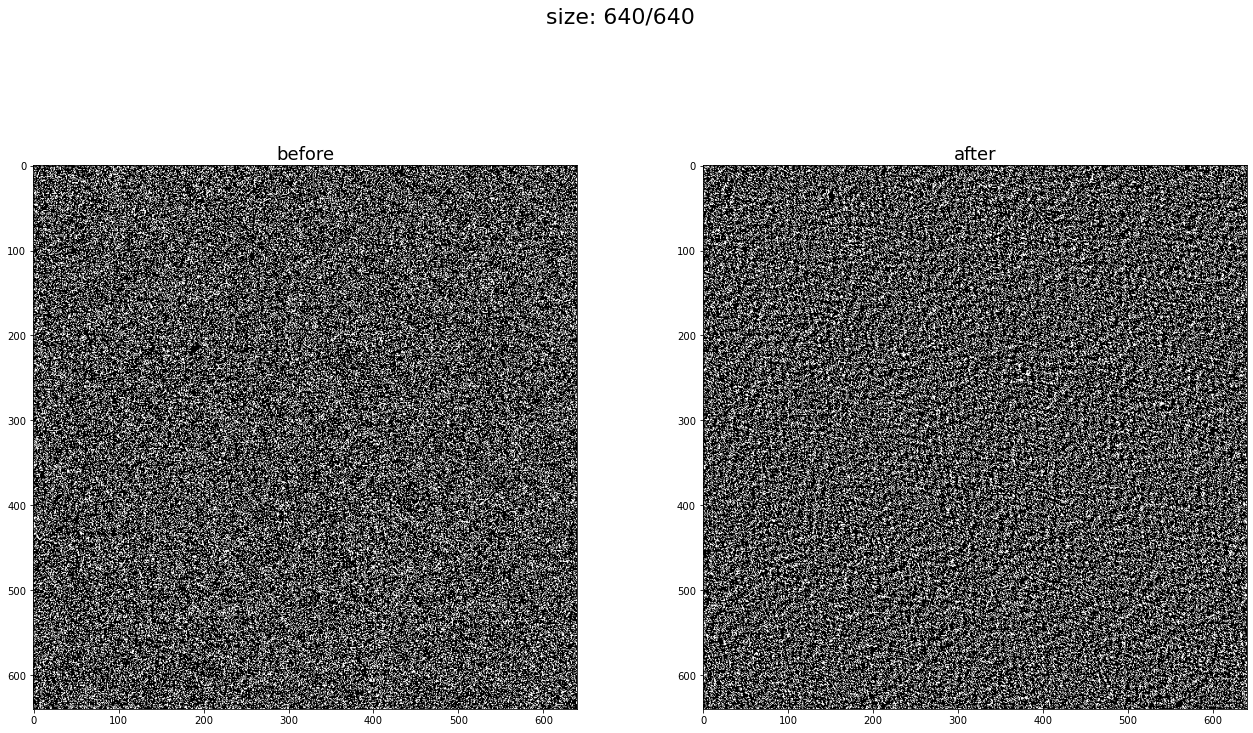

In [54]:

neighbourhood={(3,3): +2,    
        (-3,-3): +45,    
        (-2,-2): 34, 
        (-1,-1): +5,
        (1,1): 9,
        (2, 2): 43,
        (4,4): 44,
        (5,5):55,
        (6,6):24,
        (7,7):21,
        (-4,-4):21,
        (-5,-5):21,
        (-6,-6):11,
        (-7,-7):124}

bitmap = generate_bitmap(640,640, 0.7)
temperature = lambda i: 0.999**i
simulated_annealing(bitmap, neighbourhood, temperature)

In [ ]:
neighbourhood={(-1,0):1,
                (-2,0):1, 
                (-3,0):1, 
                (-4,0):1, 
                (1,0):1, 
                (2,0):1, 
                (3,0):1, 
                (4,0):1, 
                (0,1):1, 
                (0,2):1,
                (0,3):1, 
                (0,4):1, 
                (0,-1):1, 
                (0,-2):1, 
                (0,-3):1, 
                (0,-4): 1}

bitmap = generate_bitmap(640,640, 0.5)
temperature = lambda i: 0.999**i
simulated_annealing(bitmap, neighbourhood, temperature)


In [ ]:
neighbourhood={(-1,0):1,
                (-1,1):1, 
                (-1,-1):1, 
                (0,1):1, 
                (0,-1):1, 
                (1,1):1, 
                (1,0):1, 
                (1,-1):1}

bitmap = generate_bitmap(640,640, 0.82)
temperature = lambda i: 0.999**i
simulated_annealing(bitmap, neighbourhood, temperature, max_iterations = int(2e6))

In [ ]:
bitmap = generate_bitmap(640,640, 0.2)
simulated_annealing(bitmap, neighbourhood, temperature)

In [ ]:


neighbourhood = {}

n = 25
for i in range(1,n):
    neighbourhood[(i,i)] = 1
    neighbourhood[(-i,i)] = 1
    neighbourhood[(-i,-i)] = 1
    neighbourhood[(i,-i)] = 1


bitmap = generate_bitmap(640,640, 0.3)
simulated_annealing(bitmap, neighbourhood, temperature)

In [ ]:
neighbourhood = {}

n = 6
for i in range(1,n):
    neighbourhood[(i,i)] = 1
    neighbourhood[(-i,i)] = 1
    neighbourhood[(-i,-i)] = 1
    neighbourhood[(i,-i)] = 1
    
bitmap = generate_bitmap(640,640, 0.7)
simulated_annealing(bitmap, neighbourhood, temperature,max_iterations=int(1e6))

In [ ]:
neighbourhood = {}

n=20
for i in range(1,n):
    neighbourhood[(i+2,1)] = random.randint(0,1e4)



bitmap = generate_bitmap(640,640, 0.25)
simulated_annealing(bitmap, neighbourhood, temperature,max_iterations=int(2e6))

In [ ]:
bitmap = generate_bitmap(640,640, 0.7)
simulated_annealing(bitmap, neighbourhood, temperature,max_iterations=int(2e6))